In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
metrics = {'accuracy': accuracy}
tf.summary.scalar('accuracy', accuracy[1])

if mode == tf.estimator.ModeKeys.EVAL:
    return tf.estimator.EstimatorSpec(
        mode, loss=loss, eval_metric_ops=metrics)

NameError: ignored

In [0]:
scatter_const=10
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score




root_folder = '/content/gdrive/My Drive/deep learning for heat transfer/'

import os
import scipy.io as spio

from matplotlib import pyplot as plt
from matplotlib import colors

    
def initFig(k_num,thre_num,rows=4,cols=4,image_height=4,image_width=5,hspace = 0.3, wspace=0.4):

  fig, axs = plt.subplots(rows,cols, figsize=(cols*image_width, rows*image_height), facecolor='w', edgecolor='k')
  fig.subplots_adjust(hspace, wspace)
  axs = axs.ravel()
  return fig, axs

def readXY(dirData,L,num_par,num):
  
  mat1 = spio.loadmat(dirData, squeeze_me=True)
  record1 = mat1['record'] # array
  maxT1=record1[:,num_par+1]
  X1=record1[:,num:num+L**2]
  
  return X1, maxT1

def readXYseries(dirDatas,L,num_par,num):
  flag=1
  for counter, dirData in enumerate(dirDatas):
    X1,maxT1=readXY(dirData,L,num_par,num)
    if flag:
      geo=X1
      maxT=maxT1
      flag=0
    else:
      geo=np.concatenate((geo,X1),axis=0)
      maxT=np.concatenate((maxT,maxT1),axis=0)
  return geo, maxT

def getTthre(maxT, thre_num,buffer):
  maxInc=np.amax(maxT)
  minInc=np.amin(maxT)
  print("Max Temperature Increase is",str(maxInc))
  print("Min Temperature Increase",str(minInc))
  # visualize the weight

  start=int(math.ceil(minInc / 10.0)) * 10
  end=int(math.floor(maxInc / 10.0)) * 10
  T_thres=np.linspace(start+buffer, end-buffer, thre_num)
  return T_thres

def printStr(T_thre) :
  g = float("{0:.2f}".format(T_thre))
  return str(g)
def plotRank_ax(x,y,titles,ax,size):
  
  im = ax.scatter(x, y, s=size, alpha=0.5)
  ax.set(title=titles)

class MidpointNormalize(colors.Normalize):
	"""
	Normalise the colorbar so that diverging bars work there way either side from a prescribed midpoint value)

	e.g. im=ax1.imshow(array, norm=MidpointNormalize(midpoint=0.,vmin=-100, vmax=100))
	"""
	def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
		self.midpoint = midpoint
		colors.Normalize.__init__(self, vmin, vmax, clip)

	def __call__(self, value, clip=None):
		# I'm ignoring masked values and all kinds of edge cases to make a
		# simple example...
		x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
		return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))
  
def print2D_ax(array,L,titles,ax):
  if array.shape[0]==1:
    B=np.reshape(array, (-1, L))
  else:
    B = np.reshape(array[0,:], (-1, L))
  elev_min=np.amin(array[0,:])
  elev_max=np.amax(array[0,:])
  plot_max=max(elev_max,-elev_min)
  mid_val=0
  cmap='bwr' 
  #plt.pcolor(B,cmap=cmap, clim=(elev_min, elev_max), norm=MidpointNormalize(midpoint=mid_val,vmin=elev_min, vmax=elev_max))
  im = ax.pcolor(B,cmap=cmap, clim=(-plot_max, plot_max), norm=MidpointNormalize(midpoint=mid_val,vmin=-plot_max, vmax=plot_max))
  ax.figure.colorbar(im, ax=ax)
  ax.set(title=titles)
  
def plotRankCNN(L,dirDatas,thre_plot,modeCNN=1,buffer=0,isSeries=False,thre_num=4,image_height=5):
  num_par=4
  num_stats=4
  num=num_par+num_stats
  k_num=1
  class_names=['cooled','heated']
  if isSeries:
    geo, maxT=readXYseries(dirDatas,L,num_par,num)
  else:
    geo, maxT=readXY(dirDatas,L,num_par,num)
  T_thres=getTthre(maxT,thre_num,buffer)
  
  k_num=1
  k=0
  i=thre_plot
  cols=4
  rows=int(k_num*thre_num/cols)
  fig,axs=initFig(k_num,thre_num,rows,cols,image_height)
  class_names=['cooled','heated']

  x_train1, x_test1, y_train1, y_test1 = train_test_split(geo, maxT, test_size=0.25, random_state=0)

  T_thre=T_thres[i]
  y_train=np.where(y_train1 > T_thre, 1, 0)
  y_test=np.where(y_test1 > T_thre, 1, 0)
  train_test_set=x_train1,y_train,x_test1,y_test,y_test1
  seq=1*(k*thre_num+i)
  if modeCNN==1:
    CNN_simple_rank(train_test_set,axs,seq,L,T_thre,plotProcess=True)
  else:
    CNN_Estimator_rank(train_test_set,axs,seq,L,T_thre,plotProcess=True)





def CNN_Estimator_rank(train_test_set,axs,seq,L,T_thre,plotProcess):
    x_train,y_train,x_test,y_test,y_test1=train_test_set
    # all parameters not specified are set to their defaults
    #print(x_train.shape)
    #x_train.reshape(-1,L,L)
    #print(x_train.shape)
    model_dirs="/tmp/ht_cnn_model_"+str(L)+"_Thre_"+str(T_thre)
    # Create the Estimator
    ht_classifier = tf.estimator.Estimator(
    model_fn=cnn_model_fn, model_dir="/tmp/ht_cnn_model_"+str(L)+"_Thre_"+str(T_thre))

    # Set up logging for predictions
    tensors_to_log = {"probabilities": "softmax_tensor"}

    logging_hook = tf.train.LoggingTensorHook(
    tensors=tensors_to_log, every_n_iter=50)

    # Train the model
    train_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"x": x_train},
    y=y_train,
    batch_size=100,
    num_epochs=None,
    shuffle=True)

    # train one step and display the probabilties
    ht_classifier.train(input_fn=train_input_fn, steps=1000)
    #if plotProcess:
      #tensorboard --logdir=model_dirs
    
    eval_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"x": x_test},
    y=y_test,
    num_epochs=1,
    shuffle=False)

    eval_results = ht_classifier.evaluate(input_fn=eval_input_fn)
    print(eval_results)
    



      

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import numpy as np

tf.logging.set_verbosity(tf.logging.INFO)

def cnn_model_fn(features, labels, mode,params):
  L=9
  fcUnit=L*L
  """Model function for CNN."""
  # Input Layer
  input_layer = tf.reshape(features["x"], [-1, L, L, 1])

  # Convolutional Layer #1
  conv1 = tf.layers.conv2d(
      inputs=input_layer,
      filters=32,
      kernel_size=[3, 3],
      padding="same",
      activation=tf.nn.relu)
  # producing a layer of (L-2)*(L-2)
  #padded into L*L
  # Pooling Layer #1
  pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[3, 3], strides=2)
  # producing (L-2-3)/2


  # Dense Layer
  pool2_flat = tf.reshape(pool1, [-1, int((L-3)/2+1) * int((L-3)/2+1) * 32])
  dense = tf.layers.dense(inputs=pool2_flat, units=fcUnit, activation=tf.nn.relu)
  dropout = tf.layers.dropout(
      inputs=dense, rate=0.4, training=mode == tf.estimator.ModeKeys.TRAIN)

  # Logits Layer
  logits = tf.layers.dense(inputs=dropout, units=2)

  predictions = {
      # Generate predictions (for PREDICT and EVAL mode)
      "classes": tf.argmax(input=logits, axis=1),
      # Add `softmax_tensor` to the graph. It is used for PREDICT and by the
      # `logging_hook`.
      "probabilities": tf.nn.softmax(logits, name="softmax_tensor")
  }

  if mode == tf.estimator.ModeKeys.PREDICT:
    return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)

  # Calculate Loss (for both TRAIN and EVAL modes)
  loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)

  # Configure the Training Op (for TRAIN mode)
  if mode == tf.estimator.ModeKeys.TRAIN:
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
    train_op = optimizer.minimize(
        loss=loss,
        global_step=tf.train.get_global_step())
    return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)

  # Add evaluation metrics (for EVAL mode)
  eval_metric_ops = {
      "accuracy": tf.metrics.accuracy(
          labels=labels, predictions=predictions["classes"])
  }
  return tf.estimator.EstimatorSpec(
      mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras import datasets, layers, models

def CNN_simple_rank(train_test_set,axs,seq,L,T_thre,plotProcess):
  x_train,y_train,x_test,y_test,y_test1=train_test_set
  input_layer = tf.reshape(x_train, [-1, L, L, 1])
  test_layer = tf.reshape(x_test, [-1, L, L, 1])
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(L, L, 1)))
  model.add(layers.MaxPooling2D((3, 3),strides=(1, 1)))
  #model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  #model.add(layers.MaxPooling2D((2, 2)))
  #model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(2, activation='softmax'))
  if seq==0:
    model.summary()
  model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

  model.fit(input_layer, y_train, epochs=1)
  test_loss, test_acc = model.evaluate(test_layer, y_test)
  print('The accuracy is'+str(test_acc))
  predictions = model.predict(test_layer)
  print(predictions.shape)
  print(predictions[0,:])
  order1=predictions[:,1].argsort()
  rank1=order1.argsort()
  order2=np.argsort(y_test1)
  rank2=np.argsort(order2)
  #print(rank2.shape)
  titles='Ranks of T_thre='+printStr(T_thre)
  size=scatter_const/math.log10(x_test.shape[0])
  #print (size)
  plotRank_ax(rank1,rank2,titles,axs[seq],size)
  return order1[:num_can],order2[:num_can]

def logitClassify_loop_thre_plotCanML(num_can,train_test_set,axs,num,L,T_thre):
    x_train,y_train,x_test,y_test,y_test1=train_test_set
    # all parameters not specified are set to their defaults
    logisticRegr = LogisticRegression(solver='lbfgs')
    logisticRegr.fit(x_train, y_train)
    y_pred2=logisticRegr.predict(x_test)
    
    probas = logisticRegr.predict_proba(x_test)
    order1=probas[:,1].argsort()

    #print(rank1.shape)
    order2=np.argsort(y_test1)
    #print(y_test1[order2[1]])
    #print(rank2.shape)
    titles='Ranks of T_thre='+printStr(T_thre)
    size=scatter_const/math.log10(x_test.shape[0])
    #print (size)

    for i in range(num_can):
      geoCan1=x_test[order1[i],:]
      geoCan2=x_test[order2[i],:]
      geoCan1 = np.reshape(geoCan1, (-1,L*L))
      geoCan2 = np.reshape(geoCan2, (-1,L*L))
      #print(geoCan1.shape)

      print2D_ax(geoCan1,L,'ML  Top '+str(i+1)+'(T_thre='+printStr(T_thre)+')',axs[num+i])

def plotCanML(order1,bench,num_can,train_test_set,axs,num,L,T_thre):   
    x_train,y_train,x_test,y_test,y_test1=train_test_set
    print(order1.shape)
    print(x_test.shape)
    
    for i in range(num_can):
      print(order1[i])
      geoCan1=x_test[order1[i],:]
      geoCan1 = np.reshape(geoCan1, (-1,L*L))
      #print(geoCan1.shape)
      flag=1
      #if (bench == order1[i]).all(1).any():
      if np.isin(order1[i],bench):
        flag=-1
      print2D_ax(flag*geoCan1,L,'ML  Top '+str(i+1)+'(T_thre='+printStr(T_thre)+')',axs[num+i])

        

def plotCanFEM(num_can,x_test,y_test1,axs,num,L):
    order2=np.argsort(y_test1)
    #print (size)
    for i in range(num_can):

      geoCan2=x_test[order2[i],:]

      geoCan2 = np.reshape(geoCan2, (-1,L*L))

      print2D_ax(-geoCan2,L,'FEM Top '+str(i+1),axs[num+i])
    return order2[:num_can]
  
def plotRankCNN_loop(L,dirDatas,num_can,plotLinear=False,buffer=0,isSeries=True,thre_num=4,image_height=5):
  num_par=4
  num_stats=4
  num=num_par+num_stats
  k_num=1
  class_names=['cooled','heated']
  if isSeries:
    geo, maxT=readXYseries(dirDatas,L,num_par,num)
  else:
    geo, maxT=readXY(dirDatas,L,num_par,num)
  T_thres=getTthre(maxT,thre_num,buffer)
  
  k_num=1
  k=0
  cols=4
  rows=int(k_num*thre_num/cols)
  fig,axs=initFig(k_num,thre_num,rows,cols,image_height)
  
  x_train1, x_test1, y_train1, y_test1 = train_test_split(geo, maxT, test_size=0.25, random_state=0)
  
  #plot FEM all
  cols=num_can
  rows=thre_num
  fig1,axs1=initFig(k_num,thre_num,rows,cols,image_height)
  bench=plotCanFEM(num_can*thre_num,x_test1,y_test1,axs1,0,L)
  print(bench)

  rows=int(k_num*thre_num+1)
  fig2,axs2=initFig(k_num,thre_num,rows,cols,image_height)
  order=np.zeros((thre_num,num_can),dtype=int)
  
  for i in range(thre_num):
      T_thre=T_thres[i]
      y_train=np.where(y_train1 > T_thre, 1, 0)
      y_test=np.where(y_test1 > T_thre, 1, 0)
      train_test_set=x_train1,y_train,x_test1,y_test,y_test1
      if i==0:
        seq=1*(k*thre_num+i)
        order[i,:],order2=CNN_simple_rank(train_test_set,axs,seq,L,T_thre,plotProcess=True)
        seq2=0 
        plotCanFEM(num_can,x_test1,y_test1,axs2,seq2,L)
        seq2+=num_can
        plotCanML(order[i,:],bench,num_can,train_test_set,axs2,seq2,L,T_thre)
        
        if plotLinear:
          fig3,axs3=initFig(k_num,thre_num,rows,cols,image_height)
          seq3=0
          plotCanFEM(num_can,x_test1,y_test1,axs3,seq3,L)
          seq3+=num_can
          logitClassify_loop_thre_plotCanML(num_can,train_test_set,axs3,seq3,L,T_thre)
          
        
          
      else:
        seq=1*(k*thre_num+i)
        order[i,:],order2=CNN_simple_rank(train_test_set,axs,seq,L,T_thre,plotProcess=True)
        seq2+=num_can
        plotCanML(order[i,:],bench,num_can,train_test_set,axs2,seq2,L,T_thre)
        if plotLinear:
          seq3+=num_can
          logitClassify_loop_thre_plotCanML(num_can,train_test_set,axs3,seq3,L,T_thre)
        
  return x_test1,order,bench    


Max Temperature Increase is 83.19715961469741
Min Temperature Increase 10.638390526961125
[ 3462 19009  9326 16164 17163  3059  3641 18996 12388  3584   615  7437
  9513  1081 14810 10578]
Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 7, 7, 32)          320       
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_46 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_92 (Dense)             (None, 64)                51264     
_________________________________________________________________
dense_93 (Dense)             (None, 2)                 130       
Total params: 51,714
Trainable params: 51,714
Non-trainable pa

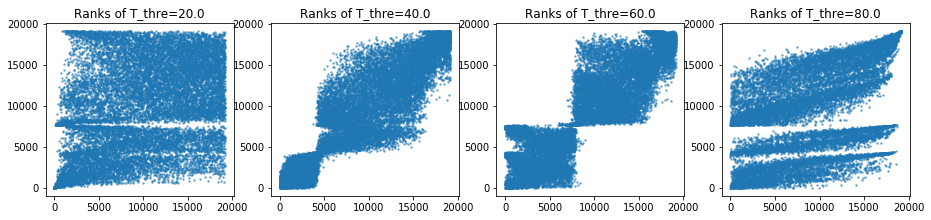

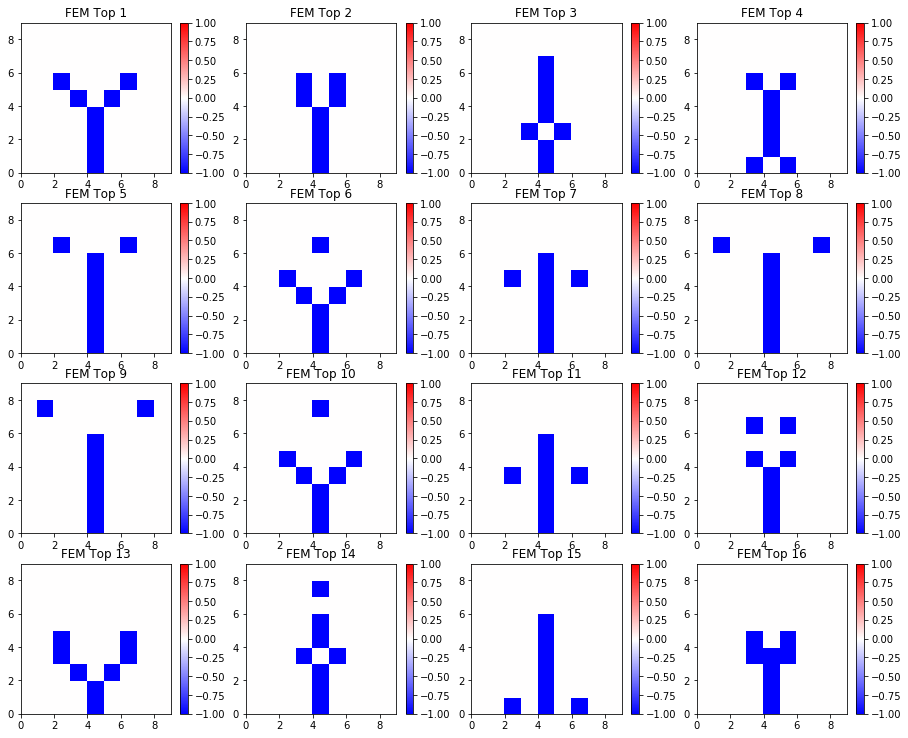

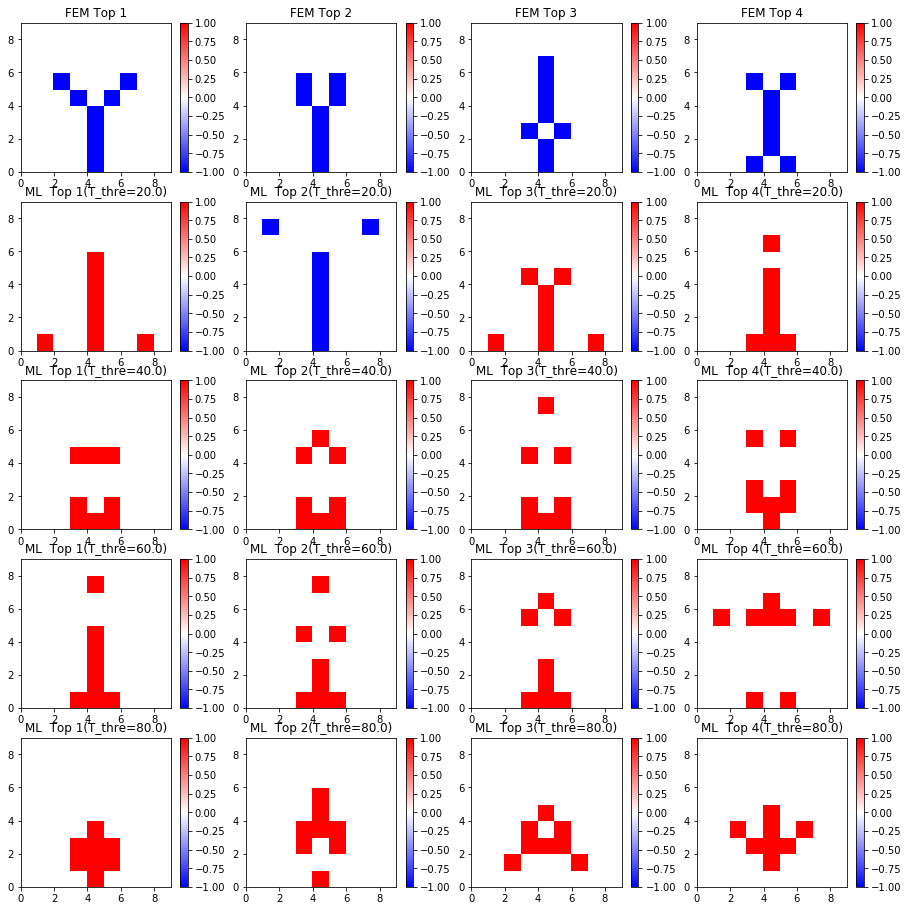

In [0]:
L=9
pos=4.5
num_can=4
num_par=4
num_stats=4
num=num_par+num_stats
dirData1=(root_folder+"data/L9/Records_mesh_1_sideLoop_1000_total_L_9_num_8_mid_2_side_3_pad_1_.mat")
dirData2=(root_folder+"data/L9/Records_mesh_1_sideLoop_1024_total_L_9_num_8_mid_2_side_3_pad_1_.mat")
dirData3=(root_folder+"data/L9/Records_mesh_1_sideLoop_276_c_L_9_num_8_mid_4_side_2_pad_1_.mat")
dirData4=(root_folder+"data/L9/Records_mesh_1_sideLoop_24_c_L_9_num_8_mid_6_side_1_pad_1_.mat")
dirData5=(root_folder+"data/L9/Records_mesh_1_sideLoop_10626_c_L_9_num_8_mid_0_side_4_pad_1_.mat")

dirDatas=(dirData1,dirData2,dirData3,dirData4)

#plotRankCNN(L,dirDatas,thre_plot=2,modeCNN=1,buffer=0,isSeries=True,thre_num=4,image_height=5)

x_test1,order1,bench=plotRankCNN_loop(L,dirDatas,num_can,plotLinear=False)

Max Temperature Increase is 83.19715961469741
Min Temperature Increase 10.638390526961125
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/ht_cnn_model_9_Thre_60.0', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fd00ba11080>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO

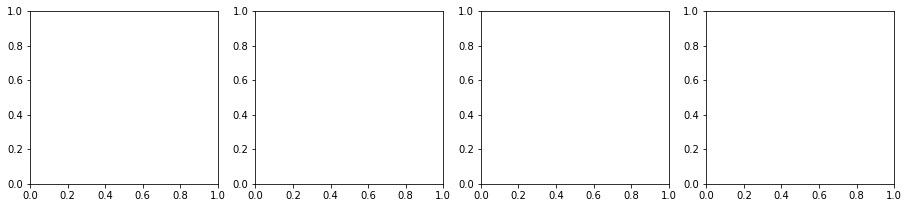

In [0]:
L=9
pos=4.5
num_can=4
num_par=4
num_stats=4
num=num_par+num_stats
dirData1=(root_folder+"data/L9/Records_mesh_1_sideLoop_1000_total_L_9_num_8_mid_2_side_3_pad_1_.mat")
dirData2=(root_folder+"data/L9/Records_mesh_1_sideLoop_1024_total_L_9_num_8_mid_2_side_3_pad_1_.mat")
dirData3=(root_folder+"data/L9/Records_mesh_1_sideLoop_276_c_L_9_num_8_mid_4_side_2_pad_1_.mat")
dirData4=(root_folder+"data/L9/Records_mesh_1_sideLoop_24_c_L_9_num_8_mid_6_side_1_pad_1_.mat")
dirData5=(root_folder+"data/L9/Records_mesh_1_sideLoop_10626_c_L_9_num_8_mid_0_side_4_pad_1_.mat")

dirDatas=(dirData1,dirData2,dirData3,dirData4)

plotRankCNN(L,dirDatas,thre_plot=2,buffer=0,isSeries=True,thre_num=4,image_height=5)

Max Temperature Increase is 83.19715961469741
Min Temperature Increase 10.638390526961125
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/ht_cnn_model_9_Thre_80.0', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fd00ba11198>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO

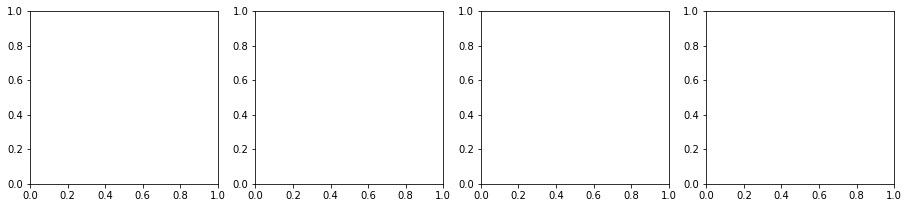

In [0]:
L=9
pos=4.5
num_can=4
num_par=4
num_stats=4
num=num_par+num_stats
dirData1=(root_folder+"data/L9/Records_mesh_1_sideLoop_1000_total_L_9_num_8_mid_2_side_3_pad_1_.mat")
dirData2=(root_folder+"data/L9/Records_mesh_1_sideLoop_1024_total_L_9_num_8_mid_2_side_3_pad_1_.mat")
dirData3=(root_folder+"data/L9/Records_mesh_1_sideLoop_276_c_L_9_num_8_mid_4_side_2_pad_1_.mat")
dirData4=(root_folder+"data/L9/Records_mesh_1_sideLoop_24_c_L_9_num_8_mid_6_side_1_pad_1_.mat")
dirData5=(root_folder+"data/L9/Records_mesh_1_sideLoop_10626_c_L_9_num_8_mid_0_side_4_pad_1_.mat")

dirDatas=(dirData1,dirData2,dirData3,dirData4)

plotRankCNN(L,dirDatas,thre_plot=3,buffer=0,isSeries=True,thre_num=4,image_height=5)